# Euler Lagrange - pendulum with  oscillating support 

We define Lagrange function as a difference between kinetic and potential energy:

\begin{equation}
\label{eq:Lagangian}
L = E_k - E_p
\end{equation}

Then equation of motion are given by:

\begin{equation}
\label{eq:EL}
\frac{d}{dt} \left (\frac{\partial L}{\partial \dot{\varphi}}\right ) - \frac{\partial L}{\partial \varphi} = 0
\end{equation}

Since this formulation in invariant with respect to the change of system off coordinates, we can use it for many problems in mechanics with constraints. 

 

## System definition

Let us define a system, 

In [40]:
load('cas_utils.sage')

In [41]:
var('l g w0')
xy_wsp = ['x','y']
uv_wsp = [('phi',r'\varphi')]

to_fun, to_var = make_symbols(xy_wsp, uv_wsp)

phi  :: has been  processed
x  :: has been  processed
y  :: has been  processed


### Horizontal oscillations of a support point

We parametrize the system similarily to mathematical pendulum, 

\begin{eqnarray}
\label{eq:parametic}
x = a \sin\left(\omega t\right) + l \sin\left({\varphi}\right) \\
y =  -l \cos\left({\varphi}\right)
\end{eqnarray}



In [42]:
# horizontal
var('a omega t')
x2u = {x:l*sin(phi)+a*sin(omega*t),y:-l*cos(phi)}
showmath(x2u)

<IPython.core.display.Math object>

**Step 1: Kinetic energy**


We have to write kinetic energy in terms of generalized coordinates:

\begin{equation}
\label{eq:Ekin}
    E_k = \frac{1}{2}(\dot x^2 + \dot y^2)
\end{equation}

Using transformation dictionary, to generalized coordinates we have $E_k(\varphi,,\dot\varphi)$:

In [43]:
Ek = 1/2*sum([x_.subs(x2u).subs(to_fun).diff(t).subs(to_var)^2 for x_ in [x,y]])
Ek = Ek.trig_simplify()
showmath(Ek)

<IPython.core.display.Math object>

**Step 2: Potential energy**

Similarily we have to express potential energy:

\begin{equation}
\label{eq:Ekin}
   E_p = g y
\end{equation}

as a function of $E_P(\varphi)$

In [44]:
Ep = g*y.subs(x2u)
showmath(Ep)

<IPython.core.display.Math object>

**Step 3: Langranian**

Now we have Lagrangian $L(\varphi,\dot\varphi)$:

In [45]:
L = Ek - Ep
showmath(L)

<IPython.core.display.Math object>

## Derivation of equations of motion

Using Euler-Lagrange formulas \ref{eq:EL} we write equation of motion in generalized coordinate $\varphi$. Note, we can differentiate over $\varphi$ and $\dot\varphi$. However to perform time derivative  we first replace symbols representing  variables with functions (i.e. Sage symbolic functions) of time. We have ``to_fun`` dictionary which automatizes this step. Then we use symbolic differenctiation ``diff``. After this operation we bring thhe result back to symbolic variable $\varphi$ and $\dot\varphi$ with ``to_var`` dictionary.

In [48]:
EL1 = L.diff(phid).subs(to_fun).diff(t).subs(to_var) - L.diff(phi)

In [49]:
showmath(EL1)

<IPython.core.display.Math object>

## Analysis

### Small angle approximation

Let see what happens if oscillations are small. We can expand in Taylor seried the equations of motion:

In [50]:
eq_lin = EL1.taylor(phi,0,1)
showmath(eq_lin)

<IPython.core.display.Math object>

In [51]:
var('alpha,omega0')
eq_lin2  = (eq_lin/l^2).expand().subs({a:l*alpha,g:l*omega0^2})
showmath(eq_lin2)

<IPython.core.display.Math object>

We see that the equations are essentially equivalent to forced harmonic oscillator. The difference might be that the effective amplitude of forcing depends on forcing frequency.

In [52]:
assume(g>0)
assume(omega0>0)
phi_anal = desolve((eq_lin/l^2).expand()\
                   .subs({a:l*alpha,g:l*omega0^2})\
                   .subs(to_fun).subs({l:1}),\
                   dvar=Phi,ivar=t,contrib_ode=True)
showmath(phi_anal)

<IPython.core.display.Math object>

In [53]:
showmath(eq_lin2)

<IPython.core.display.Math object>

### Numerical  integration

We can numerically compare if the linear approximation works for selected initial conditions and parameters. For this purpose we need to solve Euler-Lagrange equation for $\ddot\varphi$, and for following system od 1st order ODEs:

\begin{eqnarray}
\label{eq:ode}
\frac{d\varphi}{dt} &=& \dot\varphi\\
\frac{d\dot\varphi}{dt} &=& \frac{a \omega^{2} \cos\left({\varphi}\right) \sin\left(\omega t\right)}{l} - \frac{g \sin\left({\varphi}\right)}{l}
\end{eqnarray}

Note that we threat $\varphi$ and $\dot\varphi$ as independent variables. Since in Sage we use formulas where there are represented by different symbolic variables: `phi` and `dphi`, there will be no confusion of "dot" and derivative operator. 


In [54]:
rhs = EL1.solve(phidd)[0].rhs()
showmath(rhs().expand())

<IPython.core.display.Math object>

Linear system can be derived in similar way:

In [55]:
rhs_lin = eq_lin.solve(phidd)[0].rhs()
showmath(rhs_lin)

<IPython.core.display.Math object>

In [56]:
pars = {l:1,g:1,a:.03,omega:1.31}
t_end = 60
w0 = sqrt(g/l).subs(pars)

Now we can plug the system of ODE into ``desolve_odeint`` solver:

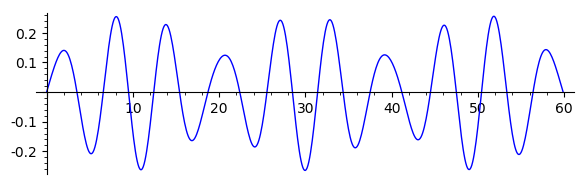

In [57]:
ode = [phid, rhs.subs(pars)]
times = srange(0,t_end,0.1)
ics = [0.0, 0.1]
sol = desolve_odeint(ode, ics, times, [phi, phid])
line( zip(times,sol[::1,0]),figsize=(6,2), )

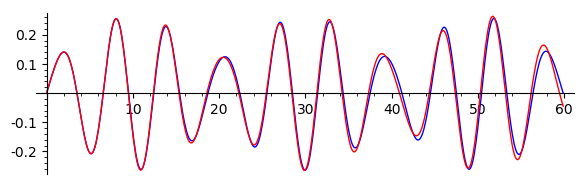

In [58]:
ode_lin = [phid, rhs_lin.subs(pars)]
times = srange(0,t_end,0.1)
ics = [0.0, 0.1]
sol_lin = desolve_odeint(ode_lin, ics, times, [phi,phid])

line( zip(times[0:],sol[0:,0]),figsize=(6,2) )\
 +line( zip(times[0:],sol_lin[0:,0]),color='red')


We see that for small oscillations the for some time. Then they diverge. One can experiment and simulate both systems for longer times to see that the divergence grows. Also larger amplitudes of driving will make them differ significantly.

### Vertical oscillations

In the case of vertical oscillations of a support point, the transformation to generalized coordinates reads:

\begin{eqnarray}
\label{eq:oscil_vert}
x = l \sin\left({\varphi}\right)\\
y= -a \cos\left(\omega t\right) - l \cos\left({\varphi}\right),
\end{eqnarray}

In [60]:
# vertical
var('a omega t')
x2u = {x:l*sin(phi), y:-l*cos(phi)-a*cos(omega*t)}
showmath(x2u)

<IPython.core.display.Math object>

Let us once again calculate Lagrangian and derive symbolically equations of motion:

In [66]:
Ek = 1/2*sum([x_.subs(x2u).subs(to_fun).diff(t).subs(to_var)^2 for x_ in [x,y]])
Ek = Ek.trig_simplify()
Ep = g*y.subs(x2u)
L = Ek - Ep
EL1 = L.diff(phid).subs(to_fun).diff(t).subs(to_var) - L.diff(phi)
showmath(EL1)

<IPython.core.display.Math object>

In [68]:
rhs = EL1.solve(phidd)[0].rhs()
showmath( rhs.expand().collect(sin(phi)) )

<IPython.core.display.Math object>

Let's try to obtain a linear approximation for small $\varphi$, as in previous case:

In [69]:
showmath(EL1.taylor(phi,0,1) )

<IPython.core.display.Math object>

We see that in this case we do not obtain a harmonic oscillator. Forcing term is multiplied by $\varphi$, i.e. the linearized equation is fundamentally different.

### Stable inverted pendulum

Vertical driving of a support point as a remarkable property - under some conditions the upper steady state can become a stable one. 

For example for  following parameters and initial condition:

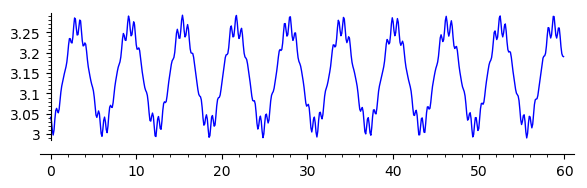

In [70]:
pars = {l:1,a:.2,g:1,omega:10.}
w0 = sqrt(g/l).subs(pars)

ode = [phid, rhs.subs(pars) ]
times = srange(0, 60, 0.1)
ics = [pi-1e-1, .0]

sol = desolve_odeint(ode, ics, times, [phi,phid])

#plt = line( zip(times,sol[::1,0]),figsize=(8,3), ticks=[None,pi/4],\
#     tick_formatter=[None,pi],gridlines=[[],[pi.n()*i for i in range(-100,100,1)]])
plt = line( zip(times,sol[::1,0]),figsize=(6,2) )

plt.show()

We observe that for above inital conditions the pendulum oscillates around **$x=\pi$ state** which is normally unstable fix point. 

In [74]:
pendulum = [vector([x,y]).subs(x2u).subs(pars).subs({phi:phi_,t:t_})\
            for t_,phi_ in zip(times,sol[:,0])]
o_point = [vector([x,y]).subs(x2u).subs(l==0).subs(pars).subs(t==t_)\
           for t_ in times ]

In [75]:
#@interact
def draw_pendulum(ith = slider(0, len(pendulum)-1,1)):
    p1,p2 = pendulum[ith], o_point[ith]
    plt = line( [p1,p2],xmin=-1, xmax=1, ymin=-1.4, ymax=1.4,\
               aspect_ratio=1,figsize=2,axes=False, title='t=%0.2f'%times[ith])
    plt += points([p1,p2],color='red',size=30,gridlines=[None,[0]],\
                 figsize=3,axes=False)
    plt += line(pendulum[:ith],thickness=0.9,color='gray',zorder=-10)
    return plt

In [53]:
#draw_pendulum(1200).save('inverted_pend.png',figsize=8)

Time evolution of the inverted stable pendulum:

![Inverted pendulum stalibized by oscillations of a support point](images/inverted_pend.png)



### System with damping

Adding damping to the system will make inverted state an stable atractor.

$$\ddot\varphi  = -2\gamma \dot\varphi + ( -\omega_0^2 - \frac{a}{l} \omega^2 \cos(\omega t))\sin(\varphi)$$

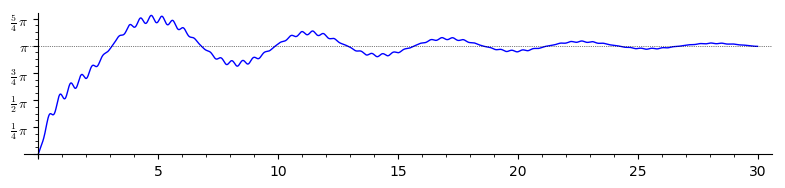

In [76]:
var('omega,omega0,gama,t,a')
pars = {l:1,a:0.152,omega0:1,omega:14.,gama:.1}
ode = [phid,\
       (-2*gama*phid+(-omega0^2-a/l*omega^2*cos(omega*t))*sin(phi)).subs(pars)]
times = srange(0,30,0.01)
ics = [0,2.1]
sol = desolve_odeint(ode,ics,times,[phi,phid])
line( zip(times,sol[::1,0]),figsize=(8,2), ticks=[None,pi/4],\
     tick_formatter=[None,pi],gridlines=[[],[pi.n()*i for i in range(-100,100,1)]])

\newpage